In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from typing import Optional, List, Any

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Generate maps

In [2]:
global_n = 4

def initialize_map(n):
    maps = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,i):
            maps[i,j] = random.randrange(50,500)
            maps[j,i] = maps[i,j]
    
    return maps

maps = initialize_map(global_n)
maps[maps == 0] = 9999
maps

array([[9999.,  100.,  390.,  104.],
       [ 100., 9999.,   83.,  375.],
       [ 390.,   83., 9999.,  124.],
       [ 104.,  375.,  124., 9999.]])

In [3]:
# Define the class


class tsp:
    def __init__(self,maps,n):
        self.global_n = n
        self.maps = maps
        
#     def __len__(self):
#         return len(self.weights)
    
    def getCost(self,ItemsList):
        self.pop = ItemsList
        
#         self.maps = self.initialize_map(self.global_n)
        self.mapValue = self.getValue_Map(self.maps,self.global_n)
        
        return sum(self.mapValue)
    
    def checkIndexViolation(self,arrayOfZerosandOne):
        try:
            return 0 if arrayOfZerosandOne.index(1) == 0 else 1
        except:
            return 1
    
    def checkPop(self,n):
        pop = self.pop
        new_pop = np.reshape(pop, (-1, n))
        new_pop = [list(x) for x in new_pop]
        check_val = [0 if ((x.count(1) == 0) or (x.count(1)>1)) else 1 for x in new_pop]
        check_val2 = [self.checkIndexViolation(x) for x in new_pop[:len(new_pop)-1]]
        
        return 0 if ((check_val.count(0) > 0) or (new_pop[n-1].index(1) !=0) or (check_val2.count(0) > 0)) else 1
        
    
    def getValue_Map(self,maps,n):
        temp = 0
        pop = self.pop
        
        if self.checkPop(n) == 0:
            return [999999]
        
        self.best_path = []
        total_val = []
        new_pop = np.reshape(pop, (-1, n))
        new_pop = [list(x) for x in new_pop]
        
        for x in new_pop:
            total_val.append(maps[temp,x.index(1)])
            temp = x.index(1)
            self.best_path.append(x.index(1))
        return total_val
    
    def printMapValueandPath(self,pop):
        
        new_pop = np.reshape(pop, (-1, self.global_n))
        new_pop = [list(x) for x in new_pop]
        

        total_val = []
        temp = 0
        for x in new_pop:
            total_val.append(maps[temp,x.index(1)])
            temp = x.index(1)
        
        
        
        
        print("Maps: ",self.maps)
        print("The best path: ",new_pop)
        print("Value Gain: ",sum(total_val))
        
        
def make_individual(n) -> List[Any]:
    individual = []
    arr = range(1,n)
    # numbers below will never contain repeated numbers (replace=False)
    numbers = np.random.choice(arr, n-1, replace=False) 
    
    for explanatory in numbers:
        
        arr_ind = [0 for x in range(n)]
        
        arr_ind[explanatory] = 1
        individual.append(arr_ind)
        
    arr_ind = [0 for x in range(n)]
    arr_ind[0] = 1
    individual.append(arr_ind)
    
    return creator.Individual(np.array(individual).flatten())

In [4]:

POPULATION_SIZE = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.3
MAX_GENERATIONS = 200
random.seed(42)

toolbox = base.Toolbox()
tsp_prob = tsp(maps,global_n)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


toolbox.register(
  "individual", 
  make_individual,
  n= global_n
)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individual)


def GenerateTspValue(individual):
    return tsp_prob.getCost(individual), # return a tuple

In [5]:

toolbox.register("evaluate", GenerateTspValue)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / (global_n^2))


gen	nevals	min	avg   
0  	100   	411	795.76
1  	80    	411	370931
2  	85    	366	420984
3  	87    	366	530897
4  	94    	366	570744
5  	82    	366	590656
6  	82    	366	571454
7  	86    	366	541370
8  	89    	366	601213
9  	78    	366	541649
10 	88    	366	591313
11 	90    	366	531644
12 	96    	366	541238
13 	90    	366	620696
14 	80    	366	600807
15 	90    	366	610690
16 	84    	366	491029
17 	81    	366	490514
18 	90    	366	500407
19 	89    	366	540492
20 	83    	366	540184
21 	85    	366	560175
22 	85    	366	680127
23 	90    	366	630250
24 	82    	366	690121
25 	77    	366	720108
26 	90    	366	740099
27 	88    	366	760093
28 	82    	366	780085
29 	91    	366	800077
30 	83    	366	750198
31 	83    	366	750197
32 	86    	366	710417
33 	87    	366	640443
34 	83    	366	680228
35 	91    	366	710416
36 	78    	366	700217
37 	92    	366	760090
38 	86    	366	670225
39 	90    	366	690523
40 	75    	366	640643
41 	93    	366	660238
42 	85    	366	630244
43 	87    	366	610143
44 	80    

Text(0.5, 1.0, 'Min and Average fitness over')

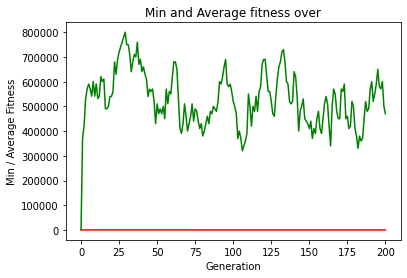

In [6]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)



# define the hall-of-fame object:
HALL_OF_FAME_SIZE = 10
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof, verbose=True)

#population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,stats=stats, halloffame=hof, verbose=True)
#print best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("-- Details of Item and Cost = ")
tsp_prob.printMapValueandPath(best)

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over')

In [ ]:
import random
from deap import base, creator, tools
from typing import Optional, List, Any


'''
Functions
'''

# def random_pick(lower: float, upper: float, step: Optional[int] = None) -> float:
#     # Pick random numbers within specified bounds 
#     if step is None:
#         return random.uniform(lower, upper)
#     else:
#         candidates_num = round((upper - lower) / step)
#         return lower + random.randint(0, candidates_num) * step


def make_individual(n) -> List[Any]:
    individual = []
    arr = range(1,n)
    # numbers below will never contain repeated numbers (replace=False)
    numbers = np.random.choice(arr, n-1, replace=False) 
    
    for explanatory in numbers:
        
        arr_ind = [0 for x in range(n)]
        
        arr_ind[explanatory] = 1
        individual.append(arr_ind)
    arr_ind = [0 for x in range(n)]
    arr_ind[0] = 1
    individual.append(arr_ind)
    return creator.Individual(individual)



creator.create("FitnessMin", base.Fitness, weights=(-1.0,))   
# creator.create("Individual", list, fitness=creator.FitnessMin)   # individual data-type : List



'''
Main
'''
pop_size = 1


toolbox.register(
  "individual", 
  make_individual,
  n=4  # now toolbox.individual uses default explanatories
)
ind = toolbox.individual()
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
pop = toolbox.population(pop_size)
print(int)
print(pop)
toolbox = base.Toolbox()

In [8]:
path_collection

{0: 3, 3: 1, 1: 2, 2: 0}

In [7]:
p = np.array([[0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]]).flatten()


new_pop = np.reshape(p, (-1, 4))
new_pop = [list(x) for x in new_pop]

total_val = []
path_collection = dict()
temp = 0
for x in new_pop:
    total_val.append(maps[temp,x.index(1)])
    path_collection[temp] = x.index(1)
    
    temp = x.index(1)
